# Naturalistic Stimuli Language Annotations Exploratory Analysis

This notebook is dedicated to uncovering the word and token properties of the CNeuroMod naturalistic stimuli set https://www.cneuromod.ca/gallery/datasets/. 

The primary objective of this notebook is to analyze the linguistic aspects of the language annotations extracted from the naturalistic stimuli, including word usage, tokens and ngram patterns.

To facilitate the analysis, the notebook makes use of functions imported from the `annotations_utils.py` module.

In [1]:
from pathlib import Path
import pandas as pd
from annotations_util import (concat_transcript,word_characteristics , word_statistics, plot_corpus_characteristics, load_json_file, find_outlaw, stopword_statistics, token_statistics, ngram_extractor, generate_ngrams)

[nltk_data] Downloading package omw-1.4 to /home/isil/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/isil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/isil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data
Load the annotation json files and fill the required fields depending on the dataset in quest. 

In [2]:
# load the annotation json files to concatanate
data_dir = "path_to_the_annotations_directory"
stimuli = ""
stimuli_set = "petit_prince.stimuli"
language = "en"
if stimuli_set == "movie10.stimuli":
    json_dir = Path(data_dir) / f"{stimuli_set}"/ "language_annotations" / f"{stimuli}"
    transcript = concat_transcript(json_dir)
elif stimuli_set == "petit_prince.stimuli":
    json_dir = Path(data_dir) / f"{stimuli_set}" / "language_annotations"/ f"{language}"
    transcript = concat_transcript(json_dir)
elif stimuli_set == "narratives.stimuli":
    json_file = Path(data_dir) / f"{stimuli_set}"/ "language_annotations"/ f"{stimuli}.json"
    transcript = load_json_file(json_file)

# Word Characteristics

Below analysis extracts the word counts, unique words, and words with the highest frequency across the seasons. 


### Total Number of Words

In [3]:
words, unique_words = word_characteristics(transcript)
print(f"The total number of words in {stimuli} is {len(words)}")
print(
    f"The total number of unique words in {stimuli} is {len(unique_words)}"
)

The total number of words in  is 15306
The total number of unique words in  is 2218


### Distribution of Words Across Seasons

In [4]:
freq_splits, unique_res, frequent_word_list, frequency_word_list, outlaws = word_statistics(transcript)
print(f"The list of the frequent words in {stimuli} are {frequent_word_list}")


The list of the frequent words in  are ['the', 'I', 'to', 'a', 'of', 'you', 'little', 'that', 'and', 'he', 'said', 's', 'prince', 'it', 'was', 't', 'in', 'my', 'me', 'And']


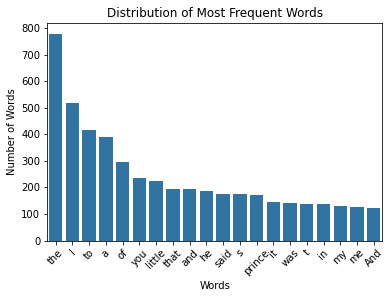

In [5]:
word_frequency = pd.DataFrame(
    {"Words": frequent_word_list, "Frequency": frequency_word_list}
)
plot_corpus_characteristics(word_frequency,
                           title = "Distribution of Most Frequent Words",
                           xlabel=  "Words",
                           ylabel = "Number of Words",
                           tilt = True,
                           type = "bar"
                           )

### Outlaw Words

In everyday conversations, we often use words in various forms to convey our emotions, introducing intonation and prosody to infuse meaning into the text. This distinction sets spoken dialogue apart from written text. In the field of Natural Language Processing (NLP), these words are recognized based on criteria such as excessive repetition of certain vowels or consonants, or the use of non-standard English that relies on the repetition of specific sounds. Thus, "outlaw words" are identified based on these criteria.

Let's identify the outlaw words in the Friends corpus and how much of the words in a particular season is consisted of outlawed words.

In [6]:
print(f"The list of the outlawed words in {stimuli} are {outlaws}")

The list of the outlawed words in  are []


# Token Analysis


Tokens are fundamental units of text that serve as the building blocks for natural language processing tasks. They are individual words or symbols extracted from a text document. The process of tokenization involves breaking down a given text into these discrete units, which can include words, punctuation, numbers, or even subword units like word stems or characters. Tokenization is a crucial step in language processing because it enables computers to analyze and manipulate text data effectively, facilitating tasks such as text classification, language modeling, and sentiment analysis.

Different tokenization methods are available, each tailored to specific analysis goals. In this analysis, we employ the fundamental byte-pair tokenization technique provided by the `BPEmb - Byte-Pair Encoding (BPE)`` Python package. This particular method has been trained on Wikipedia data.

In [7]:
tokens, unique_tokens_list, tokens_norm, total_number_of_tokens = token_statistics(transcript)
print(f"The total number of tokens in {stimuli} is: {total_number_of_tokens}")
print(f"The total number of unique tokens in {stimuli} is: {len(unique_tokens_list)}")

The total number of tokens in  is: 20551
The total number of unique tokens in  is: 2063


In [8]:
print(f"The 50 tokens in first 3 season are {tokens[:50]}")
print(f"The 50 lemmatized tokens in first 3  season are {tokens_norm[:50]}")
print(f"The 50 unique tokens in first 3  season are {unique_tokens_list[:50]}")

The 50 tokens in first 3 season are ['▁once', ',', '▁when', '▁i', '▁was', '▁six', '▁years', '▁old', ',', '▁i', '▁saw', '▁a', '▁magn', 'ific', 'ent', '▁picture', '▁in', '▁a', '▁book', '▁about', '▁the', '▁prime', 'val', '▁forest', '▁called', '▁real', '▁life', '▁stories', '.', '▁it', '▁showed', '▁a', '▁bo', 'a', '▁const', 'rict', 'or', '▁sw', 'all', 'ow', 'ing', '▁a', '▁wild', '▁animal', '.', '▁here', '▁is', '▁a', '▁copy', '▁of']
The 50 lemmatized tokens in first 3  season are ['▁once', ',', '▁when', '▁i', '▁was', '▁six', '▁years', '▁old', ',', '▁i', '▁saw', '▁a', '▁magn', 'ific', 'ent', '▁picture', '▁in', '▁a', '▁book', '▁about', '▁the', '▁prime', 'val', '▁forest', '▁called', '▁real', '▁life', '▁stories', '.', '▁it', '▁showed', '▁a', '▁bo', 'a', '▁const', 'rict', 'or', '▁sw', 'all', 'ow', 'ing', '▁a', '▁wild', '▁animal', '.', '▁here', '▁is', '▁a', '▁copy', '▁of']
The 50 unique tokens in first 3  season are ['▁twice', '▁spec', '▁animal', '▁only', '▁sket', '▁information', '▁consequ', 'how'

# Common n-grams

N-grams constitute simple but yet crucial functionality in processing natural language. It allows models to better capture the contextual information from the text, by helping the model to perform better. 

That is why understanding the n-gram characteristics of Friends text maintains an essential gain in  understanding their role in the model performance. Then let's investigate what are the n-gram properties in the Friends corpus. 

Our analysis showcase that discourse markers or filler words in English like "oh," "yeah," "right," and "well" constitute the biggest chunk of the unigrams, while phrases like "come on", "no no", "I am going to" appears mant more times in the context.

In [9]:
mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}


for ngram in range(1,5):
    ans_bigram = generate_ngrams(transcript, ngram, 20, tokens_norm)
    print(f"The {ngram}-grams in {stimuli} are listed as {ans_bigram}")

The 1-grams in  are listed as        word  wordcount
0    little        220
1      said        154
2    prince         88
3       one         85
4      like         66
5   prince.         54
6     never         41
7    planet         40
8      good         39
9     would         37
10   that's         34
11     know         34
12      i'm         33
13      me.         30
14     come         29
15      see         29
16  prince,         28
17   flower         27
18      me,         26
19    asked         26
The 2-grams in  are listed as                 word  wordcount
0      little prince         87
1     little prince.         53
2        said little         44
3     little prince,         28
4          said fox.         14
5      good morning,         13
6       asked little         12
7      morning, said         11
8      good morning.         10
9   said geographer.          8
10          said me,          7
11           one day          7
12     lamp lighter.          6
13       